In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score, accuracy_score
import warnings

In [ ]:
data = pd.read_csv('Song_features.csv') 
x = data.loc[:, 'tempo':].values

In [ ]:
# DATA STANDARDISATION:
stdScaler = StandardScaler()
stdScaler.fit(x)
std_data = pd.DataFrame(stdScaler.transform(x), columns=data.loc[:,'tempo':].columns)

In [ ]:
Nstd_PC = 20
std_pca = PCA(n_components=Nstd_PC)
std_PCs = std_pca.fit_transform(std_data.values)
std_PCs = pd.DataFrame(data = std_PCs) 
std_PCs.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,3.932201,-6.633168,-6.369480,-3.037136,-1.258663,1.388341,-6.478333,1.697067,-0.149408,-0.901972,3.880220,-1.400690,0.654215,-2.112999,3.467416,1.679704,0.510532,-1.865022,0.438745,1.218658
1,-9.294444,12.504964,-0.492255,-8.308796,-0.916196,-1.346157,1.284002,-0.020529,-5.818921,-4.754879,-0.291570,1.625971,1.589376,-2.118084,2.087555,-2.940041,0.230489,0.019271,-1.632881,0.321240
2,-11.155233,-3.115244,1.716494,-4.481141,-1.034165,-1.916271,2.241760,-2.159584,3.244431,1.627010,3.737249,-0.726864,0.487912,4.660124,-0.246606,-3.693215,-0.753194,-0.242230,0.951864,-1.839610
3,-12.756031,3.482679,5.477421,0.033139,-2.709122,0.340760,-0.311389,-1.659605,5.551583,1.908528,0.310546,0.921256,4.469803,1.187151,-0.534381,-2.741386,-0.755089,-0.018584,-0.150471,1.084901
4,-0.052598,-3.853899,2.540937,4.581153,-1.792723,1.041768,1.447469,-0.792778,-3.432261,-2.222610,1.551297,-1.783466,-0.210514,-0.400180,-0.889652,1.353305,-0.579910,-0.554866,-0.288302,-0.325282


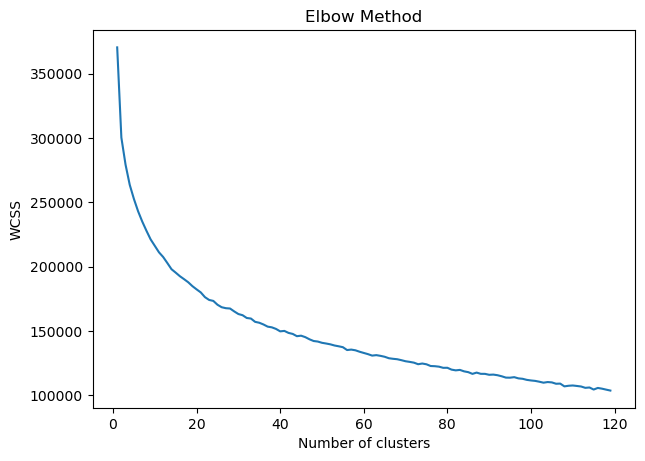

In [ ]:
clust=120
wcss = []
for i in range(1, clust):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(std_PCs)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, clust), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
silhouette_avg = []
for num_clusters in range(10,clust):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(std_PCs)
    silhouette_avg.append(silhouette_score(std_PCs, kmeans.predict(std_PCs)))

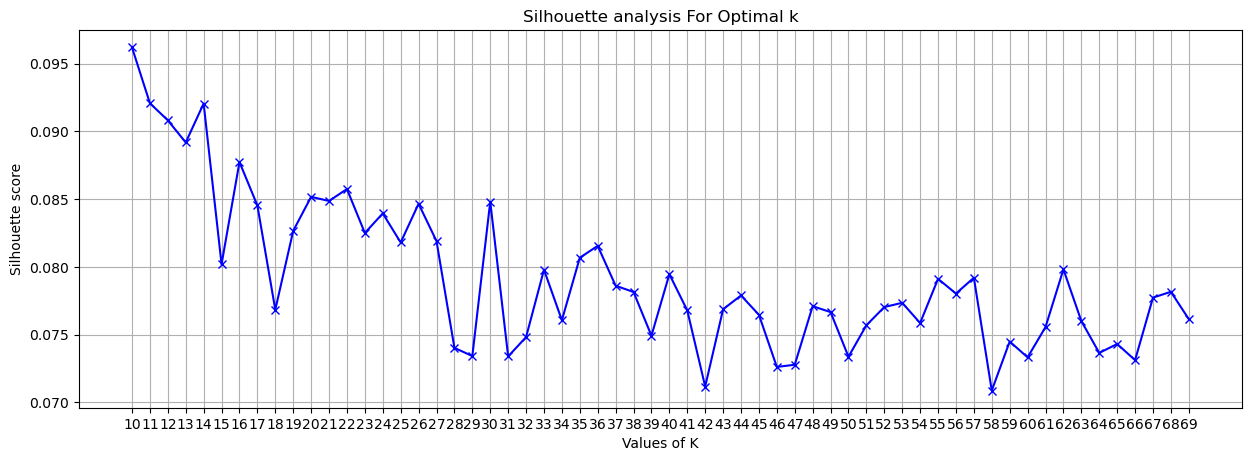

In [ ]:
fig= plt.subplots(figsize = (15,5))
plt.plot(range(10,clust),silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.xticks(range(10,clust))
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.grid()
plt.show()

In [ ]:
n_clusters = 50
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
km = kmeans.fit(std_PCs)
cluster_map = pd.DataFrame()
cluster_map['song_name'] = data['song_name']
cluster_map['cluster'] = km.labels_
#cluster_map.head()

In [ ]:
clusters = [[] for _ in range(n_clusters)]
for i, song in enumerate(data['song_name']):
    clusters.append(song)

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(cluster_map.sort_values(by=['cluster','song_name']))

                                              song_name  cluster
55                                            Apple.mp3        0
133                                      Boyfriends.mp3        0
209                                    Consequences.mp3        0
308                                Falling_For_Boys.mp3        0
400                               Happier_Than_Ever.mp3        0
737   Nothing_New__feat__Phoebe_Bridgers___Taylor_s_...        0
860                                         Sandman.mp3        0
932                                     Stand_Still.mp3        0
1016                        The_Joker_And_The_Queen.mp3        0
1107                                        Warrior.mp3        0
1121  We_Were_Happy__Taylor_s_Version___From_The_Vau...        0
1123                What_A_Time__feat__Niall_Horan_.mp3        0
112                           bitches_broken_hearts.mp3        0
170                              champagne_problems.mp3        0
708                      

In [ ]:
warnings.filterwarnings("ignore")
inputsong=input('Enter a song: ')
distance = []
song = data[(data.song_name == inputsong)].head(1).values[0]
rec = data[data.song_name != inputsong]
for songs in rec.values:
    d = 0
    for col in np.arange(len(rec.columns)):
        if not col in [0]:
            d = d + np.absolute(float(song[col]) - float(songs[col]))
    distance.append(d)
rec['distance'] = distance
rec = rec.sort_values('distance')
columns = ['song_name']
rec[columns][:10]

Enter a song: Ronan.mp3


,song_name
218,Crowded_Room__feat__6LACK_.mp3
725,New_Year_s_Day.mp3
261,Don_t_Wanna_Think.mp3
1025,The_Moment_I_Knew__Taylor_s_Version_.mp3
461,illicit_affairs.mp3
331,First_Man.mp3
228,Daddy_Issues.mp3
308,Falling_For_Boys.mp3
582,Lightweight.mp3
1014,The_Happiest_Girl.mp3
